# Mushroom Classification Using Machine Learning 🍄

file-20230322-20-w936wx.jpg

***
Mushrooms have been enjoyed as ingredients for decades now, but many of them have also been known to cause disease or even death. How do we know which mushrooms are edible, and which are inedible? This machine learning project aims to classify mushrooms into "Edible", "Inedible", and "Unknown" categories based on phenotypic features and characteristics of 23 fungal species. <br> **Disclaimer: Do not use this as an actual guide to determine if a mushroom is poisonous or not, this is simply a project to fine-tune my machine learning skills.**
***

### Link to dataset:
https://www.kaggle.com/datasets/uciml/mushroom-classification/data
***

## Importing libraries

In [13]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Importing dataset

In [14]:
mushrooms = pd.read_csv("/content/drive/MyDrive/mushrooms.csv")
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Dataset overview & exploratory data analysis (EDA)


**Attribute Information: (classes: edible=e, poisonous=p)**

**cap-shape:** bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

**cap-surface:** fibrous=f,grooves=g,scaly=y,smooth=s

**cap-color:** brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

**bruises:** bruises=t,no=f

**odor:** almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

**gill-attachment:** attached=a,descending=d,free=f,notched=n

**gill-spacing:** close=c,crowded=w,distant=d

**gill-size:** broad=b,narrow=n

**gill-color:** black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

**stalk-shape:** enlarging=e,tapering=t

**stalk-root:** bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

**stalk-surface-above-ring:** fibrous=f,scaly=y,silky=k,smooth=s

**stalk-surface-below-ring:** fibrous=f,scaly=y,silky=k,smooth=s

**stalk-color-above-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**stalk-color-below-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**veil-type:** partial=p,universal=u

**veil-color:** brown=n,orange=o,white=w,yellow=y

**ring-number:** none=n,one=o,two=t

**ring-type:** cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

**spore-print-color:** black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

**population:** abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

**habitat:** grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [15]:
mushrooms.shape

(8124, 23)

In [16]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [17]:
mushrooms.isnull().sum().sum()

0

✅ Nice, no null values.

In [18]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Checking to see if the dataset is balanced:

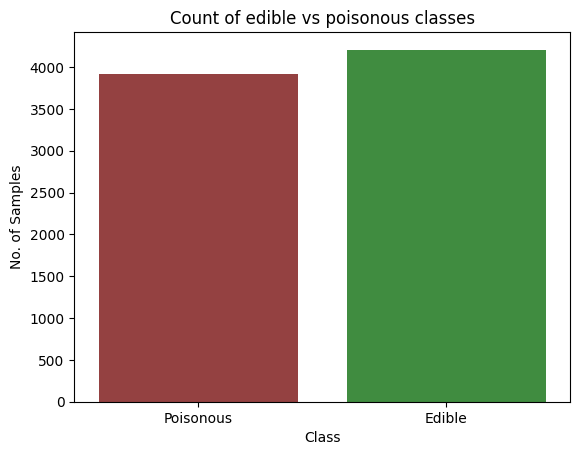

In [19]:
plt.figure()
bal=sns.countplot(x='class', data=mushrooms, alpha=.80, palette=['darkred', 'green'])
plt.title('Count of edible vs poisonous classes')
plt.ylabel('No. of Samples')
plt.xlabel('Class')
bal.set_xticklabels(['Poisonous', 'Edible'])
plt.show()

In [20]:
features = mushrooms.columns[1:]

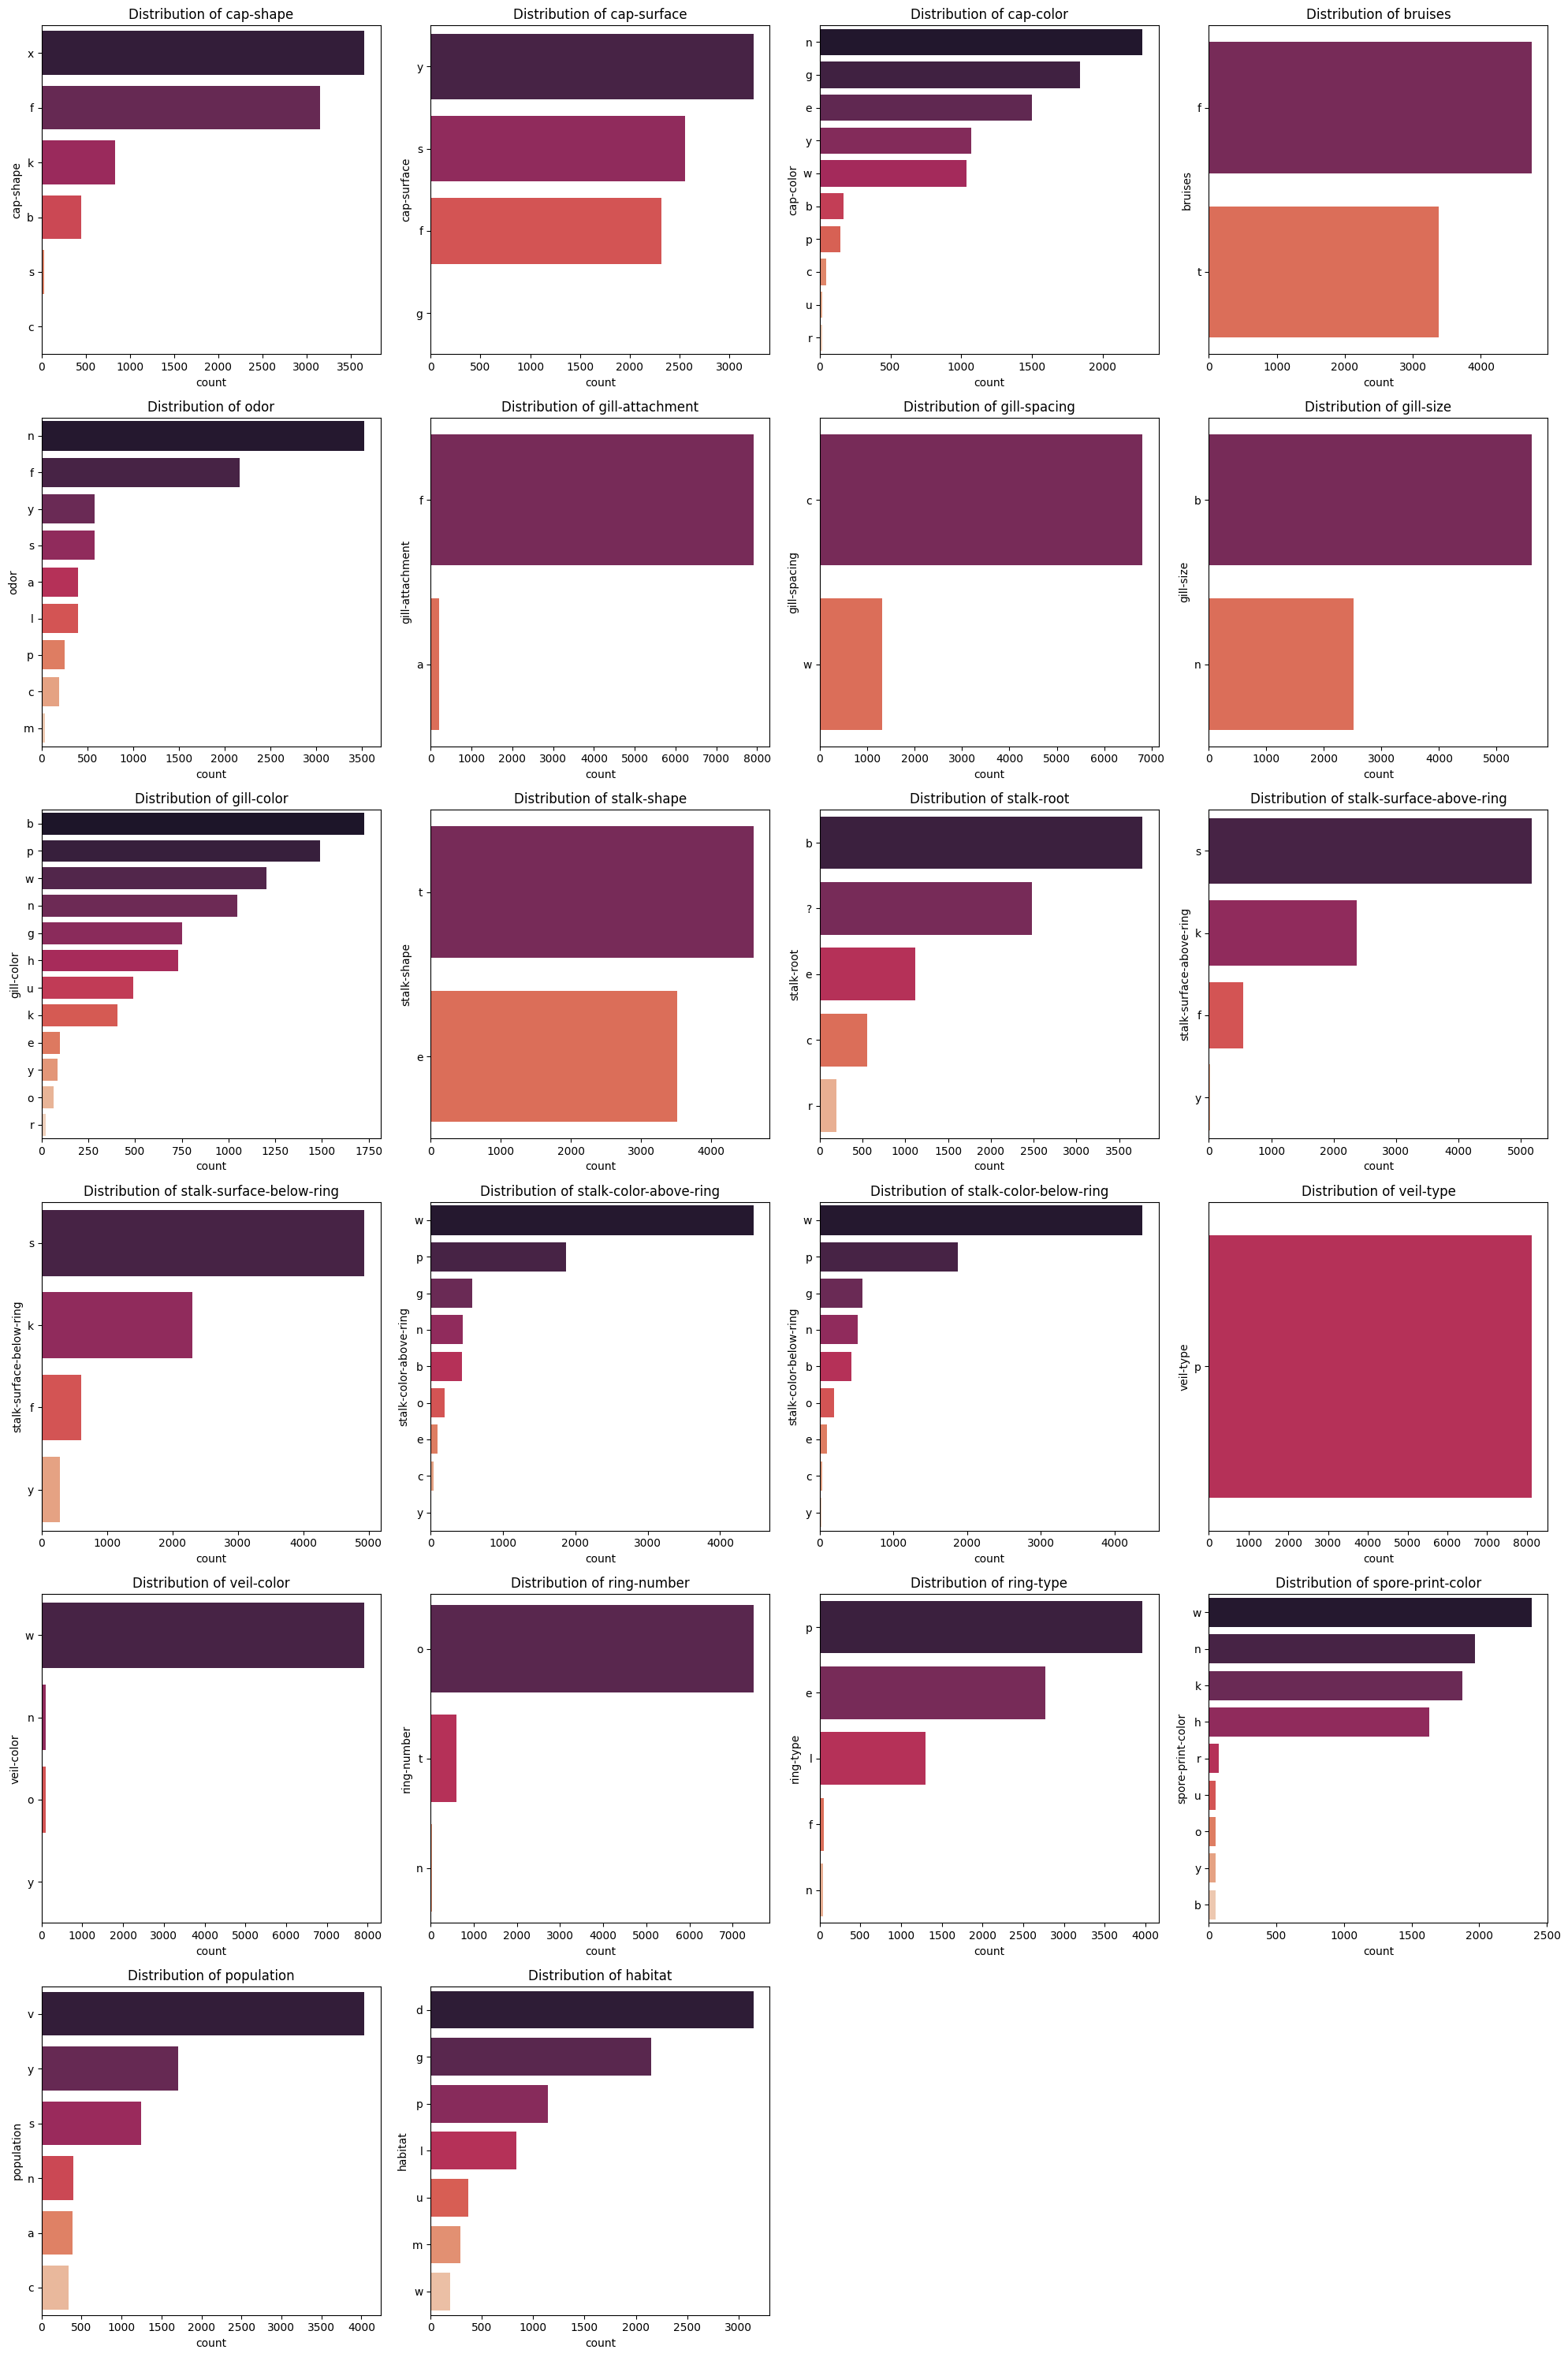

In [21]:
plt.figure(figsize=(20,30))
for i, feature in enumerate(features):
    plt.subplot(6, 4, i+1)
    sns.countplot(y=feature, data=mushrooms, order=mushrooms[feature].value_counts().index, palette='rocket')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

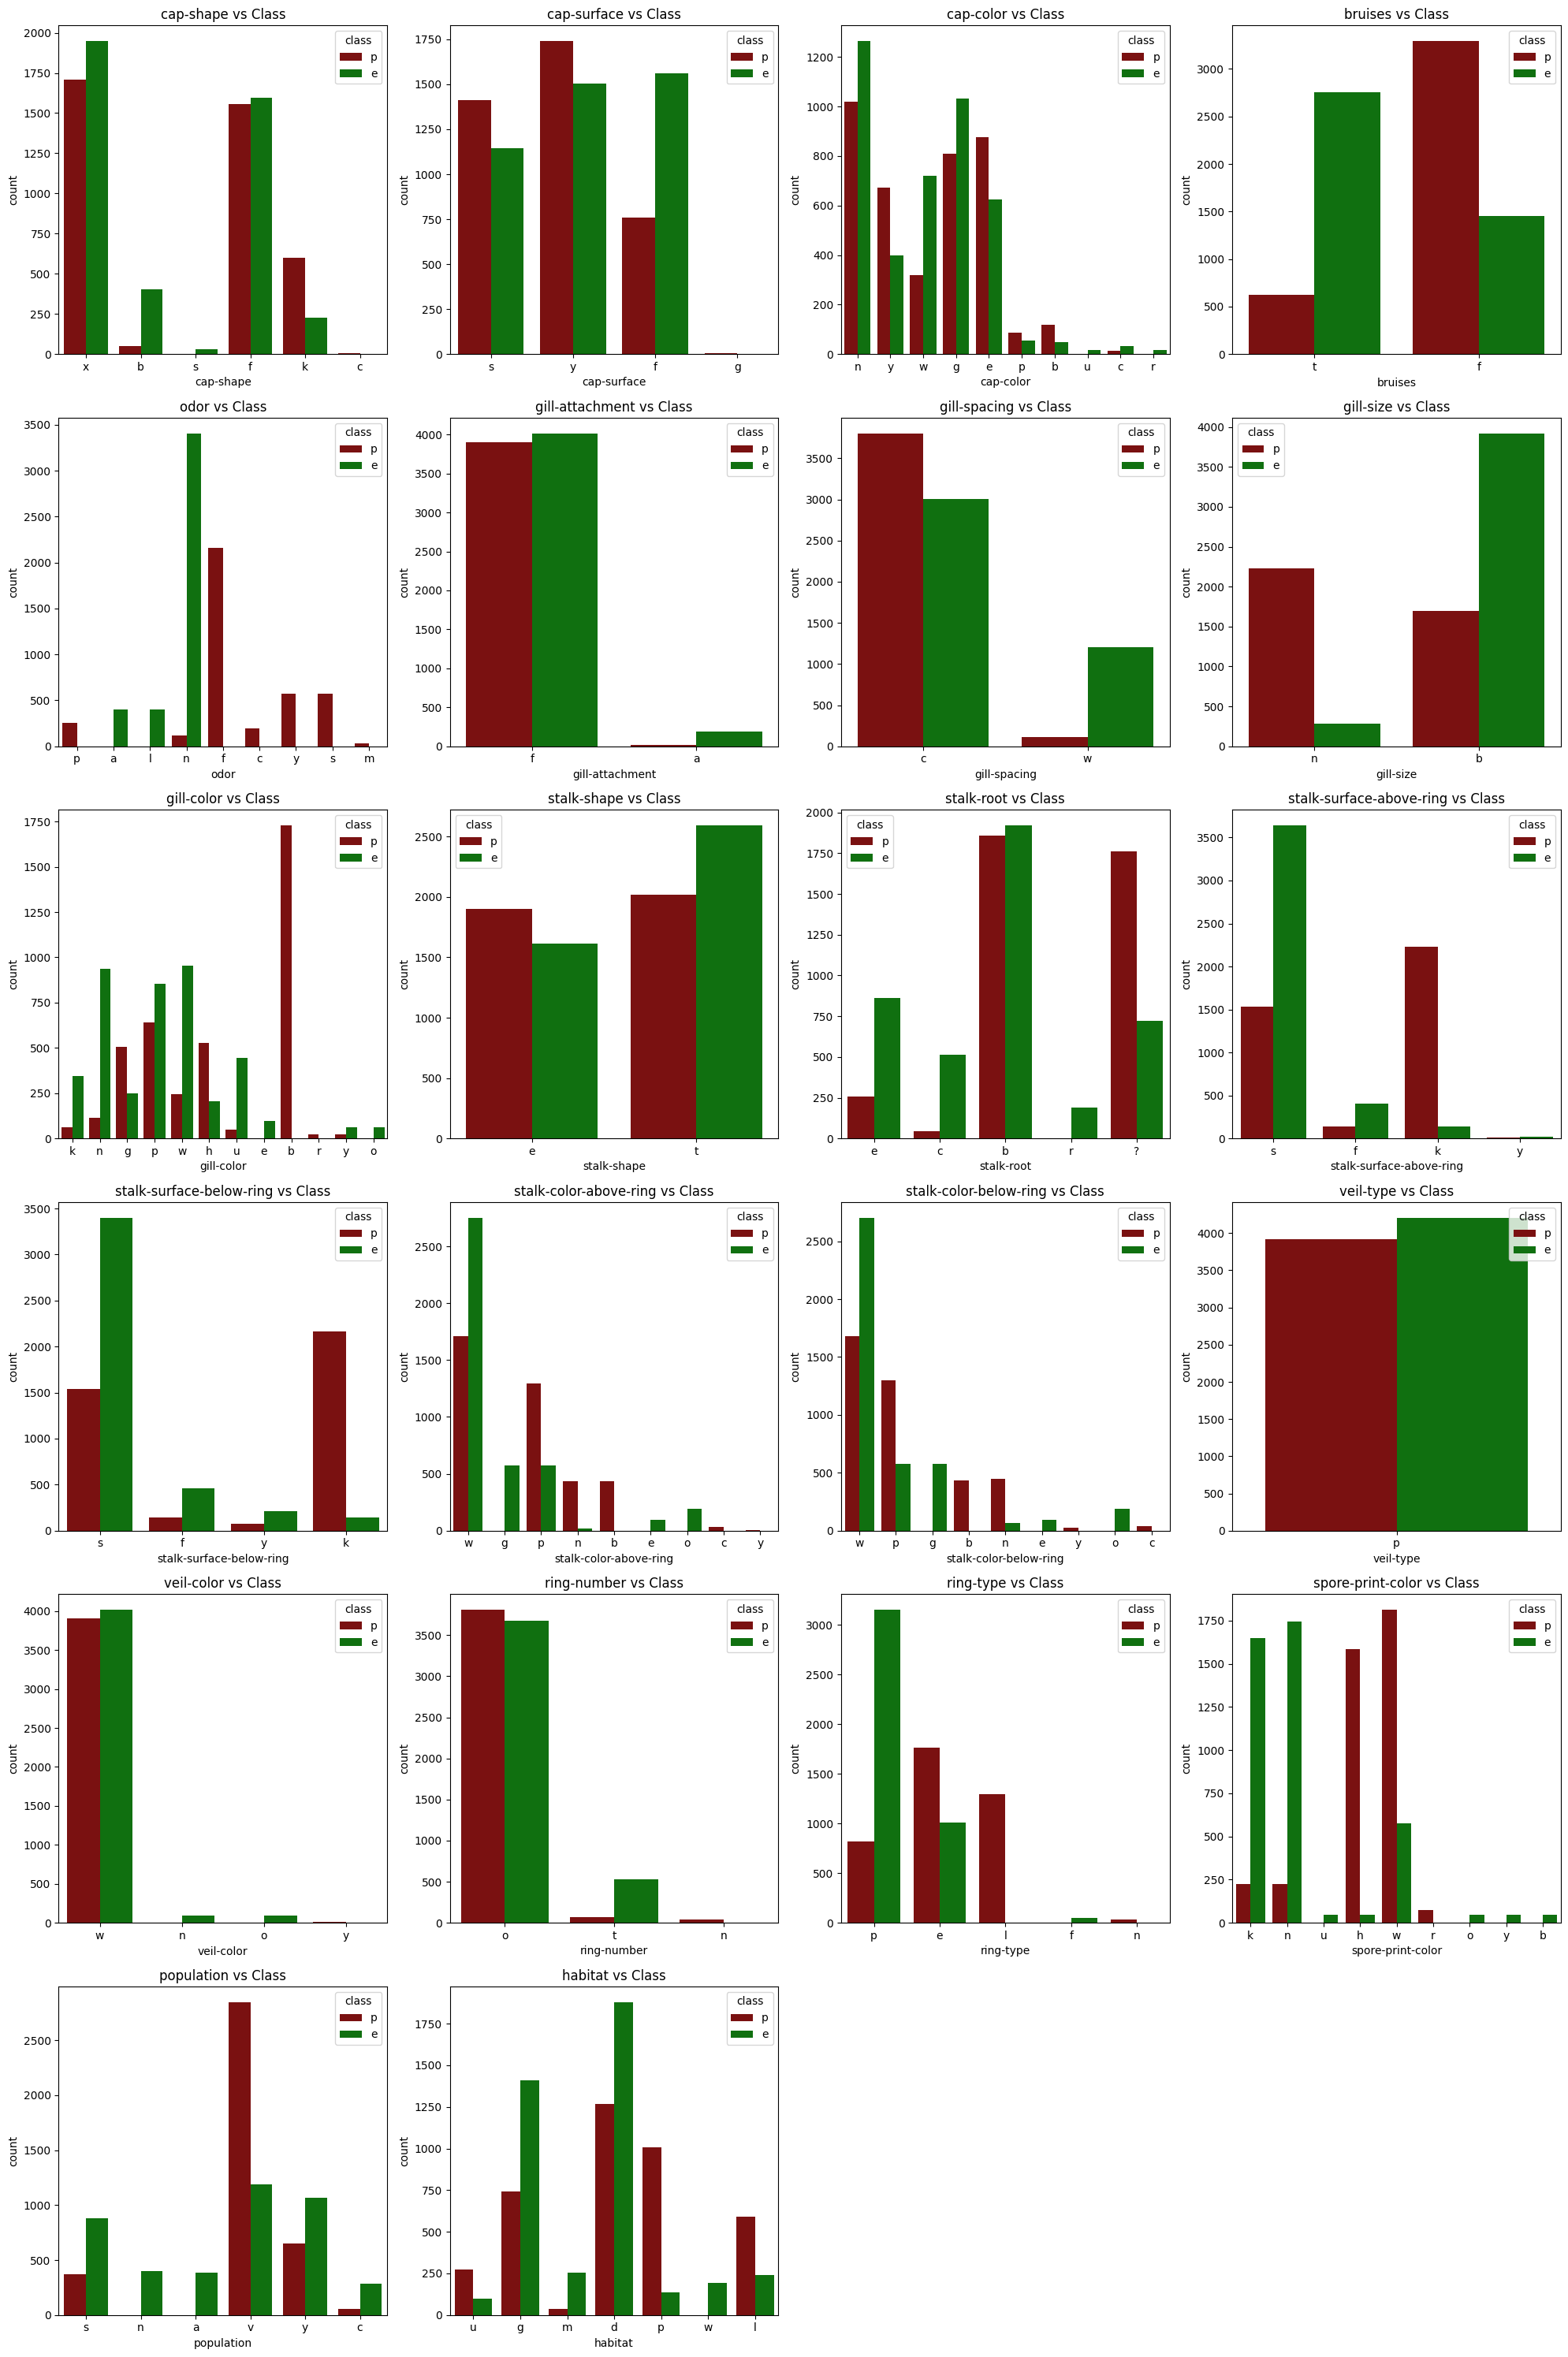

In [22]:
plt.figure(figsize=(20, 30))
for i, feature in enumerate(features):
    plt.subplot(6, 4, i+1)
    sns.countplot(x=feature, hue='class', data=mushrooms, palette=['darkred', 'green'])
    plt.title(f'{feature} vs Class')
plt.tight_layout()
plt.show()

## Modelling

In [23]:
label_encoders = {}
for column in mushrooms.columns:
    le = LabelEncoder()
    mushrooms[column] = le.fit_transform(mushrooms[column])
    label_encoders[column] = le

In [24]:
X = mushrooms.drop(["class"], axis=1)
y = mushrooms["class"]

### Splitting the data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model 1: Logistic regression

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred_lr = lr.predict(X_test)

In [28]:
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.947076923076923
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Confusion Matrix:
[[798  45]
 [ 41 741]]


### Model 2: K-nearest neighbours (KNN)

In [29]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred_knn = knn.predict(X_test)

In [31]:
print("K-Nearest Neighbors:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

K-Nearest Neighbors:
Accuracy: 0.9963076923076923
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[837   6]
 [  0 782]]


### Model 3: Decision tree

In [32]:
dt = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [33]:
y_pred_dt = dt.predict(X_test)

In [34]:
print("Decision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree:
Accuracy: 0.9766153846153847
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       843
           1       0.96      0.99      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

Confusion Matrix:
[[814  29]
 [  9 773]]


## Results

The model with the highest accuracy is the KNN model, although it is worth noting that false negatives in this case would lead to deadly outcomes.

## Streamlit deployment

In [35]:
filename='mushrooms.csv'
pickle.dump(knn, open(filename, 'wb'))